In [1]:
import numpy as np
import tqdm
import time
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vyhovují nejhorší případy očekávané závislosti?
Závisí střední hodnota výpočetní závislosti na sadě instancí? Jestliže ano, proč?

Oba algoritmy naprogramujte. Výpočetní složitost (čas) je nejspolehlivější a nejjednodušší měřit počtem navštívených konfigurací, to jest vyhodnocených sestav věcí v batohu. Na obou sadách pozorujte závislost výpočetního času na n, pro n v rozsahu, jaký je Vaše výpočetní platforma schopna zvládnout, a to jak maximální, tak průměrný čas. Pro alespoň jednu hodnotu n (volte instance velikosti alespoň 10) zjistěte četnosti jednotlivých hodnot (histogram) a pokuste se jej vysvětlit.
Ohledně metody větví a hranic - uvědomte si, že se jedná o rozhodovací problém a podle toho ořezávejte. Nápověda: i když je to rozhodovací problém, lze použít ořezávání podle ceny. Jak? Implementované způsoby ořezávání popište ve zprávě.
Sady NR a ZR vyhodnocujte zvlášť a proveďte jejich srovnání (stačí diskuze).


In [2]:
df = pd.read_csv("results.csv")

def r2label(val):
    if val == "set()":
        return "disabled"
    if val == "{'residuals', 'weight'}":
        return "enabled"
    raise ValueError(val)

df["optimizations"] = df.optimizations.apply(r2label)
df = df.rename(columns={"itype": "dataset"})

sdf = df[df.dataset=="NR"].copy()
zdf = df[df.dataset=="ZR"].copy()

In [3]:
hue_order=["disabled", "enabled"]

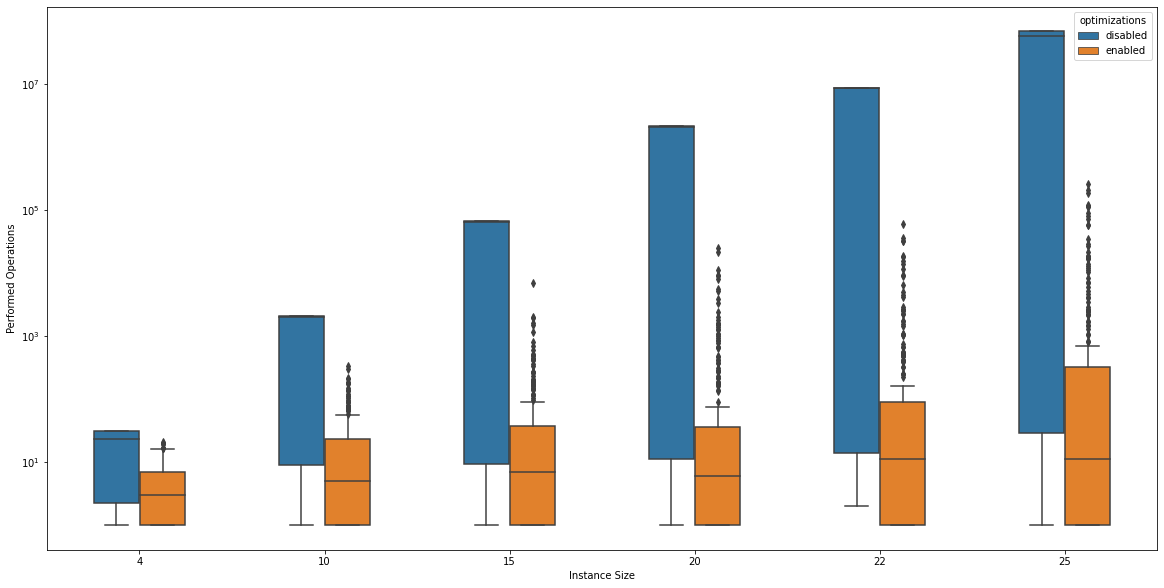

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x="size", y="opcount", data=sdf, hue="optimizations", width=0.5, hue_order=hue_order)
ax.set_ylabel("Performed Operations")
ax.set_xlabel("Instance Size")
ax.set_yscale("log")

plt.tight_layout(pad=0.1)
plt.savefig('report/size_vs_ops_boxplot.png')

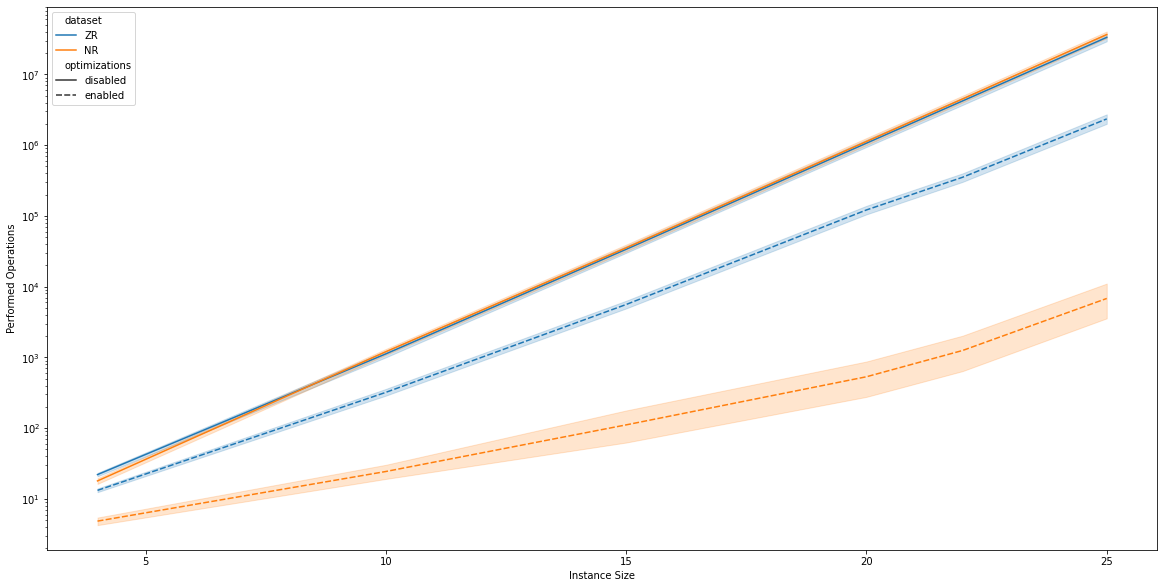

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x="size", y="opcount", data=df, hue="dataset", style="optimizations", ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Instance Size")
ax.set_ylabel("Performed Operations")

plt.tight_layout(pad=0.1)
plt.savefig('report/size_vs_ops_lineplot.png')

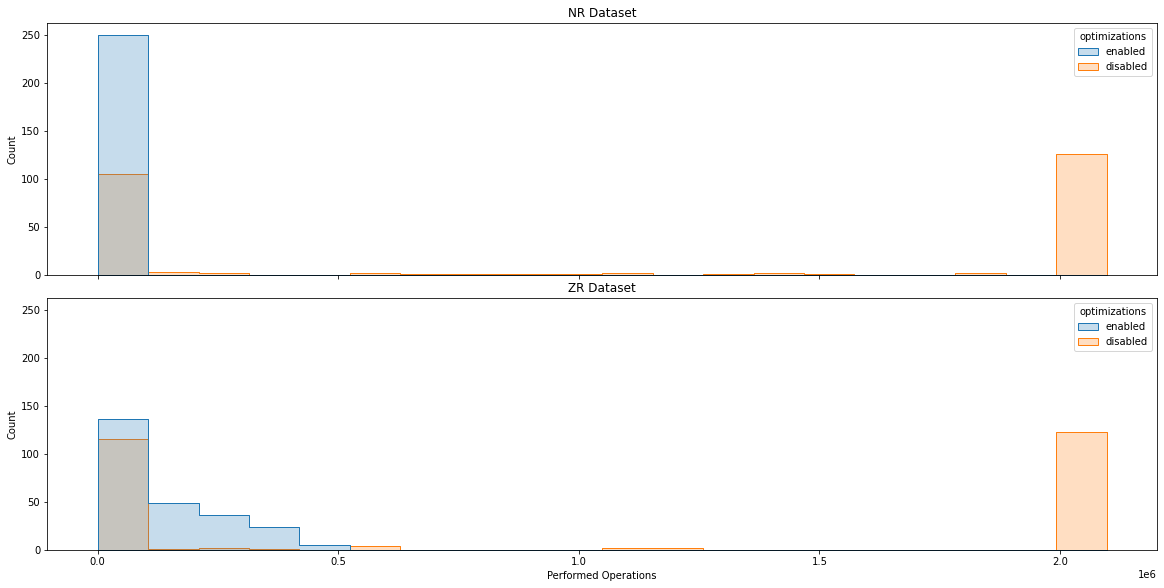

In [21]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, sharex=True, sharey=True)
sns.histplot(data=df[(df["size"]==20) & (df.dataset=="NR")], x="opcount", hue="optimizations", bins=20, multiple="layer", element="step", ax=ax[0], hue_order=["enabled", "disabled"])
ax[0].set_title("NR Dataset")
ax[0].set_xlabel("Performed Operations")
sns.histplot(data=df[(df["size"]==20) & (df.dataset=="ZR")], x="opcount", hue="optimizations", bins=20, multiple="layer", element="step", ax=ax[1], hue_order=["enabled", "disabled"])
ax[1].set_title("ZR Dataset")
ax[1].set_xlabel("Performed Operations")

plt.tight_layout(pad=0.1)
plt.savefig('report/size_20_hist.png')

plt.show()